<a href="https://colab.research.google.com/github/lucienrivat/PommePOire/blob/main/PommePoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import pathlib
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import files

# Fonction pour convertir toutes les images en niveaux de gris
def convert_to_grayscale(input_folder):
    for img_path in pathlib.Path(input_folder).rglob("*.*"):
        img = cv2.imread(str(img_path))
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite(str(img_path), gray_img)

# Télécharger et extraire les fichiers ZIP Apple et Pear
apple_zip = tf.keras.utils.get_file("Apple.zip", "https://github.com/lucienrivat/PommePOire/raw/main/apple.zip", extract=False)
pear_zip = tf.keras.utils.get_file("Pear.zip", "https://github.com/lucienrivat/PommePOire/raw/main/pear.zip", extract=False)

with zipfile.ZipFile(apple_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/')
with zipfile.ZipFile(pear_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/')

# Définir les chemins
apple_data_dir = pathlib.Path('/content/datasets/apple')
pear_data_dir = pathlib.Path('/content/datasets/pear')

# Convertir toutes les images en niveaux de gris
convert_to_grayscale(apple_data_dir)
convert_to_grayscale(pear_data_dir)

# Paramètres
data_dir = pathlib.Path('/content/datasets/')
batch_size = 3
img_height = 200
img_width = 200

# Charger le dataset avec un traitement en niveaux de gris
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training", seed=42,
    image_size=(img_height, img_width), batch_size=batch_size, color_mode='grayscale'
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation", seed=42,
    image_size=(img_height, img_width), batch_size=batch_size, color_mode='grayscale'
)

15296016/15296016 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
23769443/23769443 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 8319 files belonging to 2 classes.
Using 6656 files for training.
Found 8319 files belonging to 2 classes.
Using 1663 files for validation.


In [2]:
# Définition du modèle CNN adapté aux images en niveaux de gris
num_classes = 2
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Entraînement
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1, write_images=True)
model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[tensorboard_callback])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8425 - loss: 0.3354 - val_accuracy: 0.9916 - val_loss: 0.0229
Epoch 2/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0330 - val_accuracy: 0.9946 - val_loss: 0.0110
Epoch 3/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9937 - loss: 0.0233 - val_accuracy: 0.9068 - val_loss: 0.5712
Epoch 4/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9911 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 8.7367e-04
Epoch 5/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 1.5412e-04 - val_accuracy: 1.0000 - val_loss: 2.6597e-05
Epoch 6/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 7.2731e-06 - val_accuracy: 1.0000 - val_loss: 1.0235e-05
Epoch 7/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 1.8720e-06 - val_accuracy: 1.0000 - val_loss: 4.4103e-06
Epoch 8/10
2219/2219 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - a

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 200, 200, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 197, 197, 128)       │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 95, 95, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          83,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,376 (2.95 MB)

 Trainable params: 257,458 (1005.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 514,918 (1.96 MB)

Saving R.png to R.png


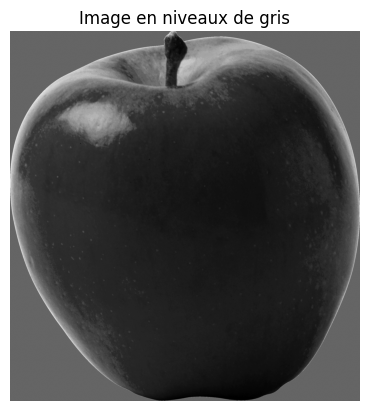

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🍐 C'est une poire !


In [4]:
# Fonction de prédiction avec conversion en niveaux de gris
def predict_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Erreur : Impossible de charger l'image.")
        return None

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title("Image en niveaux de gris")
    plt.show()

    img_to_predict = cv2.resize(image, (200, 200))
    img_to_predict = img_to_predict / 255.0
    img_to_predict = np.expand_dims(img_to_predict, axis=0)
    img_to_predict = np.expand_dims(img_to_predict, axis=-1)  # Ajout d'un canal pour le CNN

    predictions = model.predict(img_to_predict)
    predicted_class = np.argmax(predictions)
    return predicted_class

# Téléchargement et prédiction
def process_uploaded_files():
    file_to_predict = files.upload()
    for file_ in file_to_predict:
        predicted_class = predict_image(file_)
        if predicted_class == 0:
            print("🍏 C'est une pomme !")
        elif predicted_class == 1:
            print("🍐 C'est une poire !")
        else:
            print("Classe inconnue.")

process_uploaded_files()
